In [14]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [104]:
# load dataset
df=pd.read_csv('product_sales.csv',date_parser='Date')

In [82]:
# To see the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,product_price_range,customers_range
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,high_cost_product,mid_purchase_amount
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,low_cost_product,low_purchase_amount
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,mid_cost_product,low_purchase_amount
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,mid_cost_product,mid_purchase_amount
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,high_cost_product,mid_purchase_amount


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# There is no null values in this dataset
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Basic details of dataset

In [6]:

df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [7]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [8]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [9]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

<AxesSubplot:xlabel='Total', ylabel='Count'>

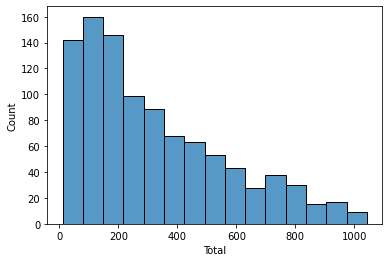

In [13]:
sns.histplot(df['Total'])

In [25]:
df['product_price_range']=pd.cut(df['Unit price'],[0,33,66,100],labels=['low_cost_product','mid_cost_product','high_cost_product'])

In [30]:
df['customers_range']=pd.cut(df['Total'],[0,350,700,1100],labels=['low_purchase_amount','mid_purchase_amount','high_purchase_amount'])

In [91]:
df['ratings_range']=pd.cut(df['Rating'],[0,3.3,6.6,10],labels=['low_rating','avg_rating','high_rating'])

* t test for checking significance difference between different gender type

* Hypothesis define
  * Null hypothesis :-  there is no significance difference between male and female purchase amount
  * Alternate hypothesis :- there is significance difference between male and female purchase amount



In [36]:
male=df[df['Gender']=='Male']['Total'] 
female=df[df['Gender']=='Female']['Total']

In [37]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=-1.5641266415241026, pvalue=0.11810484577135677)

* pvalue is greater than 0.5 so accept null hypothesis
* Result:- There is no significance difference between male and female purchase amount

<AxesSubplot:xlabel='Gender', ylabel='Total'>

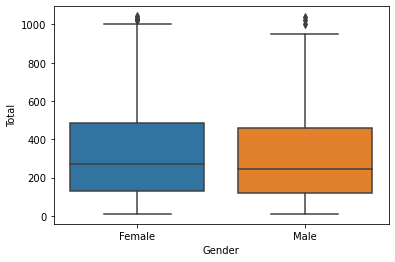

In [40]:
sns.boxplot(y=df['Total'],x=df['Gender'])
#visual way can conclude because both medians are same with little changes only

<AxesSubplot:xlabel='Gender', ylabel='Total'>

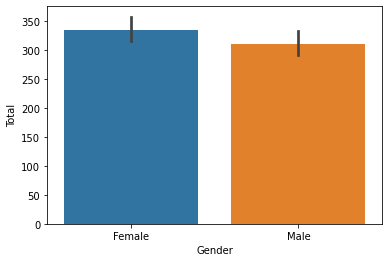

In [41]:
sns.barplot(data=df,x='Gender',y='Total')

* statistics test to check relation between different type cities

* Hypothesis define
  * Null hypothesis :- There is no significance difference between all cities
  * Alternate hypothesis :- There is significance difference between cities
  
Need to do Annova test because of two more variables in cities

In [43]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [46]:
Yangon=df[df['City']=='Yangon']['Total'].sample(328)
Naypyitaw=df[df['City']=='Naypyitaw']['Total'].sample(328)
Mandalay=df[df['City']=='Mandalay']['Total'].sample(328)

In [47]:
stats.f_oneway(Yangon,Naypyitaw,Mandalay)

F_onewayResult(statistic=0.7587719946118746, pvalue=0.4685156781056221)

* p value is greater than 0.05 so accept the null hypothesis
* There is no significance difference between all cities

<AxesSubplot:xlabel='City', ylabel='Total'>

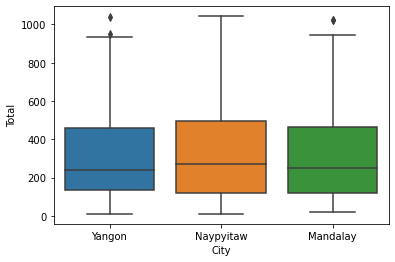

In [48]:
sns.boxplot(data=df,y='Total',x='City')
#small difference only will be there between all cities

<AxesSubplot:xlabel='City', ylabel='Total'>

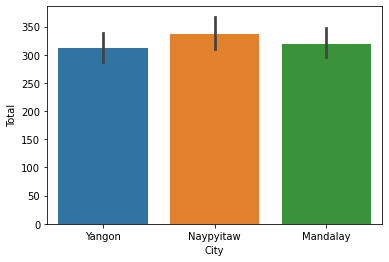

In [49]:
sns.barplot(data=df,x='City',y='Total')

In [52]:
# To check relation between product lines
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [55]:
a=df[df['Product line']=='Fashion accessories']['Total'].sample(152)
b=df[df['Product line']=='Food and beverages']['Total'].sample(152)
c=df[df['Product line']=='Electronic accessories']['Total'].sample(152)
d=df[df['Product line']=='Sports and travel']['Total'].sample(152)
e=df[df['Product line']=='Home and lifestyle']['Total'].sample(152)
f=df[df['Product line']=='Health and beauty']['Total'].sample(152)

* Hypothesis define
  * Null hypothesis :- There is no significance difference between all product lines
  * Alternate hypothesis :- There is significance difference between product lines

In [56]:
stats.f_oneway(a,b,c,d,e,f)

F_onewayResult(statistic=0.6523566658988235, pvalue=0.6597698992388557)

p value is greater than 0.05 so have to accept the null hypothesis

<AxesSubplot:xlabel='Product line', ylabel='Total'>

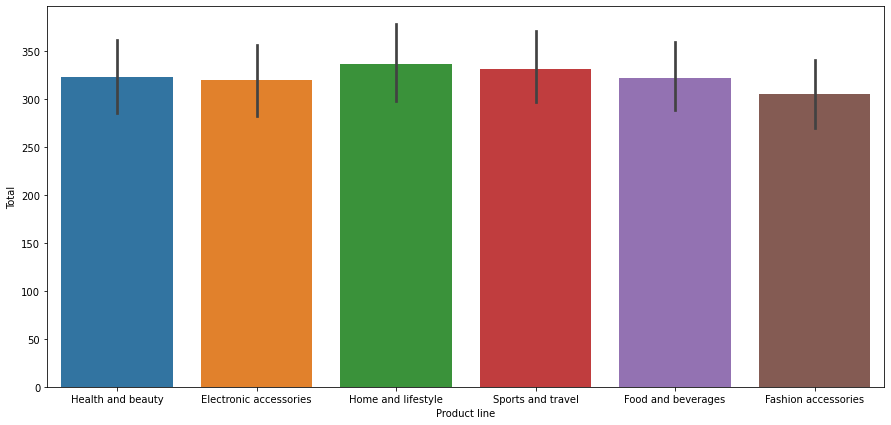

In [60]:
plt.figure(figsize=[15,7])
sns.barplot(data=df,x='Product line',y='Total')


<AxesSubplot:xlabel='Product line', ylabel='Total'>

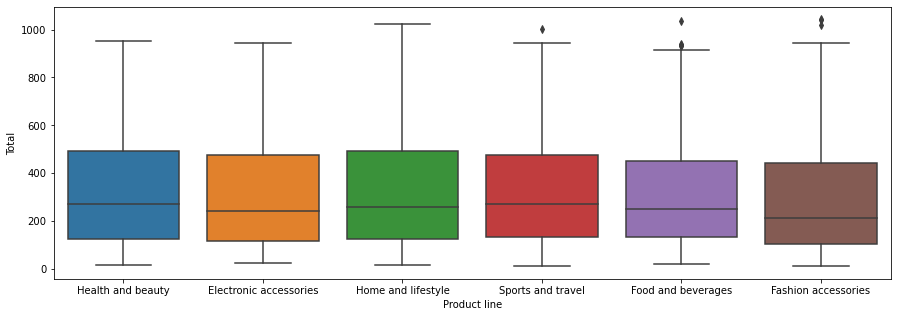

In [63]:
plt.figure(figsize=[15,5])
sns.boxplot(data=df,y='Total',x='Product line')

In [71]:
member=df[df['Customer type']=='Member']['Total']
normal=df[df['Customer type']=='Normal']['Total']

* Hypothesis define
  * Null hypothesis :- There is no significance difference between customer types
  * Alternate hypothesis :- There is significance difference between customer types

In [72]:
stats.ttest_ind(member,normal)

Ttest_indResult(statistic=0.6215268724928228, pvalue=0.5343949596143621)

p value is greater than 0.05 so have to accept the null hypothesis no significance difference between both customer types

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

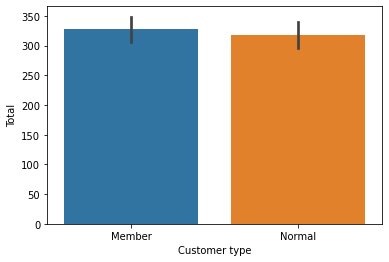

In [73]:
sns.barplot(data=df,x='Customer type',y='Total')

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

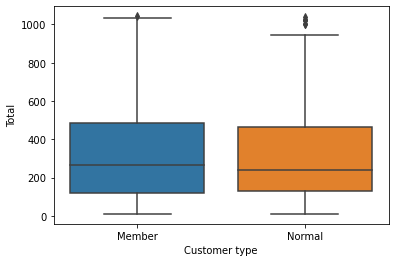

In [74]:
sns.boxplot(data=df,x='Customer type',y='Total')

In [76]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [78]:
ewallet=df[df['Payment']=='Ewallet']['Total'].sample(311)
cash=df[df['Payment']=='Cash']['Total'].sample(311)
cc=df[df['Payment']=='Credit card']['Total'].sample(311)

* Hypothesis define
  * Null hypothesis :- There is no significance difference between payment type
  * Alternate hypothesis :- There is significance difference between payment type

In [79]:
stats.f_oneway(ewallet,cash,cc)

F_onewayResult(statistic=0.02328526349184044, pvalue=0.9769843158002425)

p value is greater than 0.05 so have to accept the null hypothesis

<AxesSubplot:xlabel='Payment', ylabel='Total'>

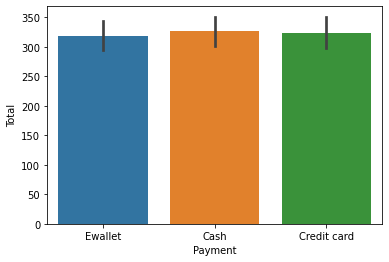

In [80]:
sns.barplot(data=df,x='Payment',y='Total')

<AxesSubplot:xlabel='Payment', ylabel='Total'>

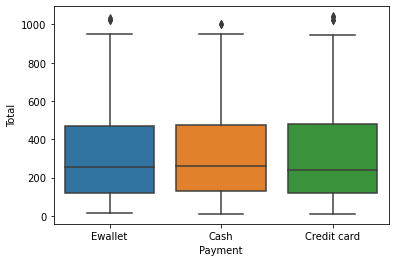

In [81]:
sns.boxplot(data=df,x='Payment',y='Total')

<AxesSubplot:xlabel='Product line', ylabel='count'>

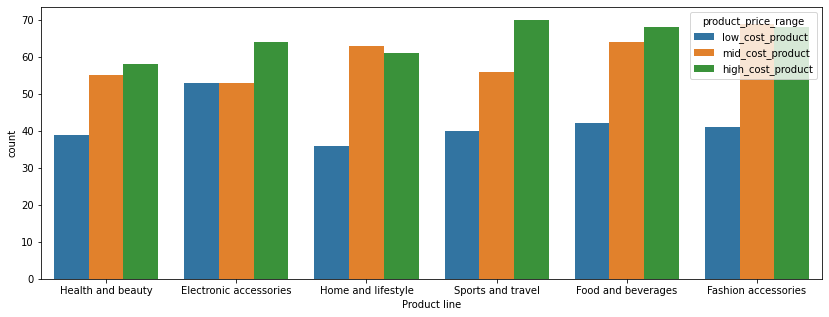

In [86]:
plt.figure(figsize=[14,5])
sns.countplot(data=df,x='Product line',hue='product_price_range')

# high cost products are high in all product lines

<AxesSubplot:xlabel='Product line', ylabel='count'>

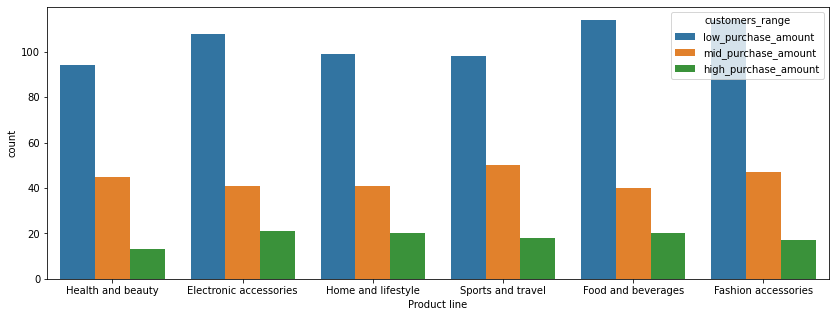

In [88]:
plt.figure(figsize=[14,5])
sns.countplot(data=df,x='Product line',hue='customers_range')
# in all categories low purchase customers only high so need to look into this try to increase high purchase amount customers

<AxesSubplot:xlabel='Product line', ylabel='count'>

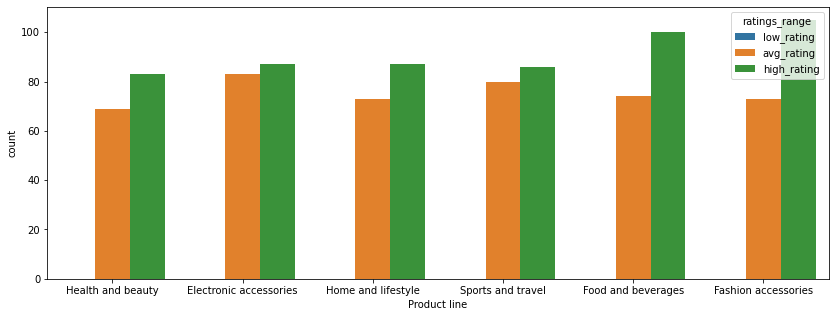

In [93]:
plt.figure(figsize=[14,5])
sns.countplot(data=df,x='Product line',hue='ratings_range')
# There is no product lines with low rating category
# food and beverages and fashion accessories having high rating

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

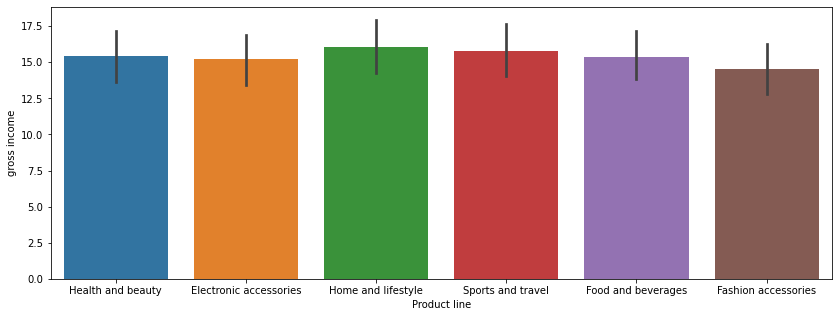

In [99]:
plt.figure(figsize=[14,5])
sns.barplot(data=df,x='Product line',y='gross income')

In [109]:
df['Date']=pd.to_datetime(df['Date'])

In [111]:
df['month']=df['Date'].dt.month_name()

In [112]:
df['day']=df['Date'].dt.day_name()

In [113]:
df['year']=df['Date'].dt.year

In [115]:
df['month_number']=df['Date'].dt.month

In [120]:
df['year_month']=df['Date'].apply(lambda x:x.strftime('%m-%y'))

<AxesSubplot:xlabel='day', ylabel='Total'>

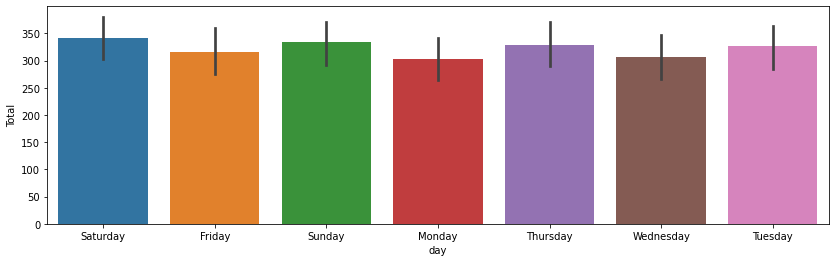

In [125]:
plt.figure(figsize=[14,4])
sns.barplot(data=df,x='day',y='Total')

In [126]:
# same sales are happened in all day but need to focus on weekend days to increase the sales

<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

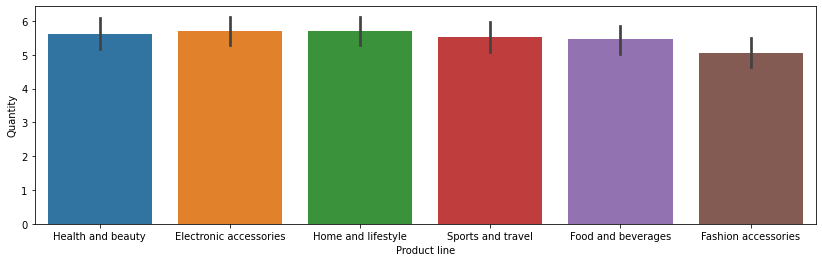

In [129]:
plt.figure(figsize=[14,4])
sns.barplot(data=df,x='Product line',y='Quantity')

In [ ]:
# all products quantity are selling same

## Recommendation

* High cost products are high in all product line categories 
* High amount purchasing customers are low so need to focus to make customers to buy more high amount purchases
* Same sales happened in all days between weekdays and weekend so need to focus to increase sales on weekend